# Assignment 3

**name:** Ani Mitoyan

**email:** am225pt@student.lnu.se

In this Assignment, you will use Python to handle several exercises related the last 4 topics of the course.
All exercises are individual. 
We expect you to submit a Jupyter Notebook (i.e., pre-organized and provided through Moodle). 
Your submission should include all the datasets and files we need to run your programs (we will run your notebook). 
When grading your assignments, we will, in addition to functionality, also take into account code quality. 
We expect well-structured and efficient solutions.

## Lecture 6 - Decision Trees and Ensembles

**Dataset:** Bank Marketing Dataset (UCI)

**Variables description:** Check the bank-aditional-names.txt file

**Task Description:** Predict whether a client will subscribe to a term deposit (y column) based on marketing data.

### Task 1 (mandatory): Data Exploration and Preprocessing

Load and clean the dataset (bank-additional-full.csv). Encode categorical features. Split the dataset into training and testing sets.

**Plot:** Show class distribution (e.g., a print) of the target variable and a bar chart of the most frequent categorical values.

**Discuss:** Is the dataset imbalanced? Which features stand out?

--- Your answer here ---

In [112]:
import pandas as pd
df = pd.read_csv(f'datasets/BankMarketing/bank-additional-full.csv', sep=';')


In [113]:
from sklearn.model_selection import train_test_split

df['y'] = df['y'].map({"no": 0, "yes": 1})
print(df.head())
df = df.drop(columns=['duration'])
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

Target class distribution:
 y
0    36548
1     4640
Name: count, dtype: int64


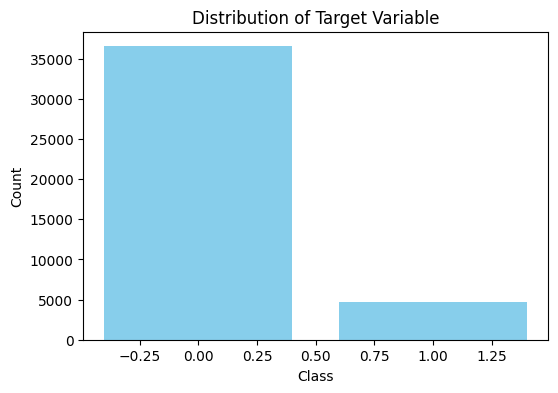

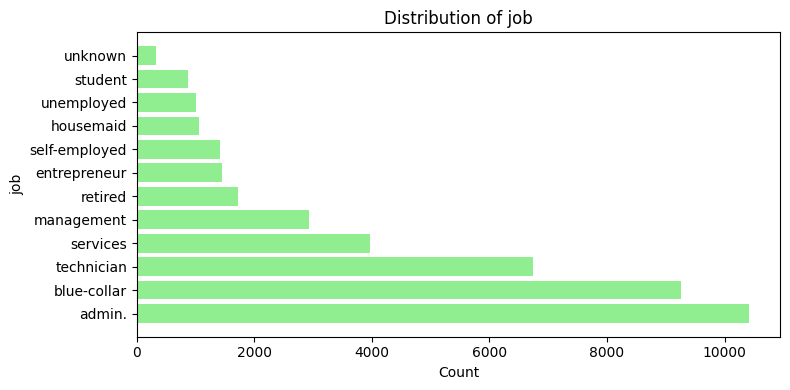

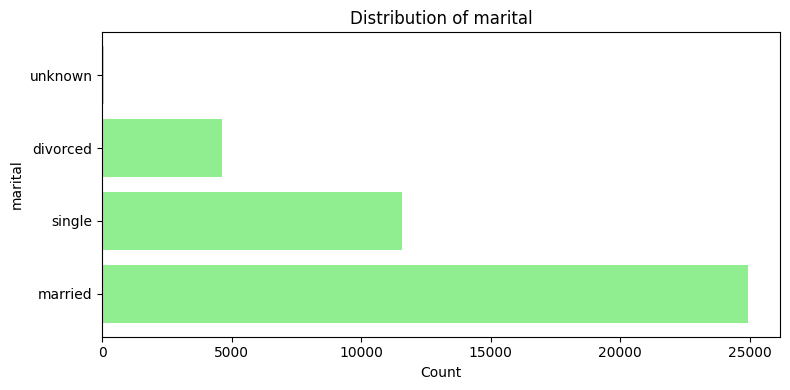

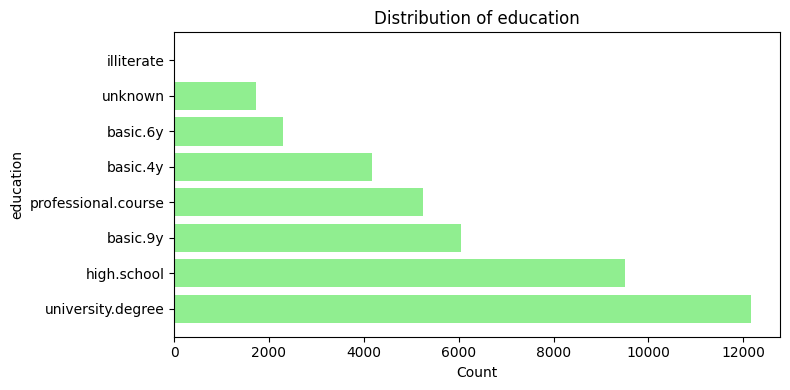

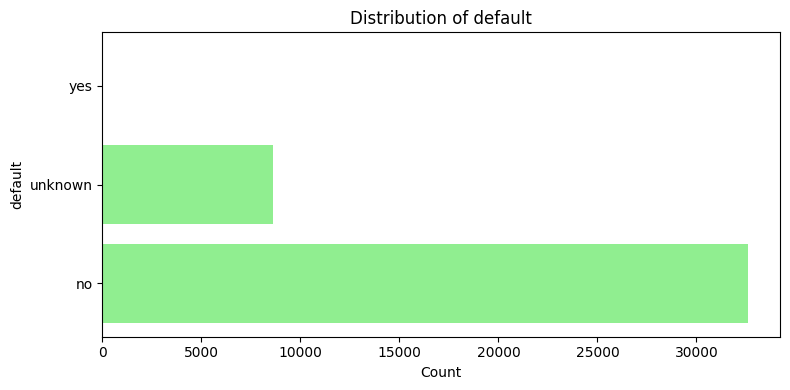

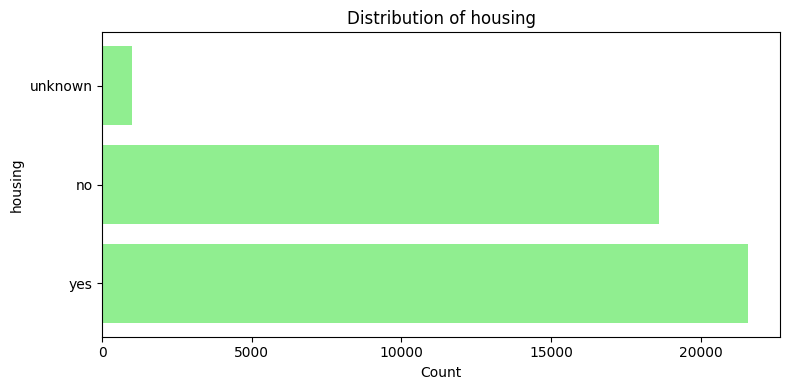

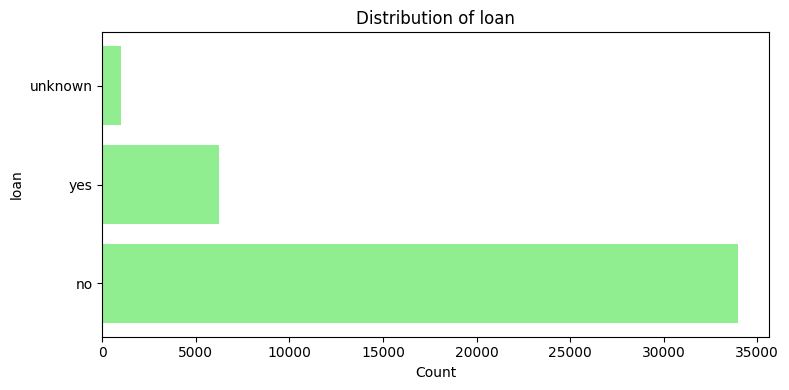

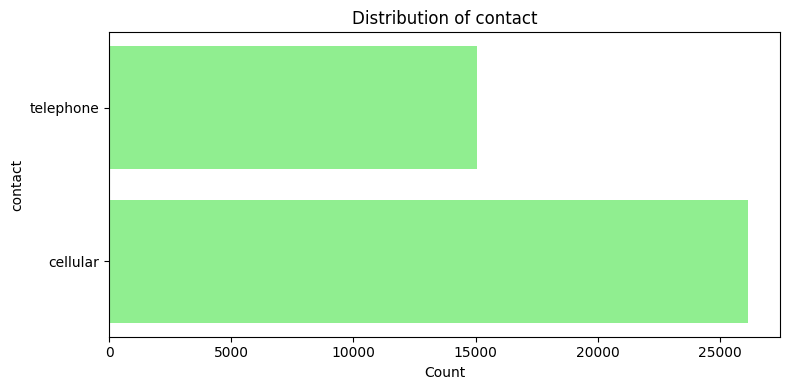

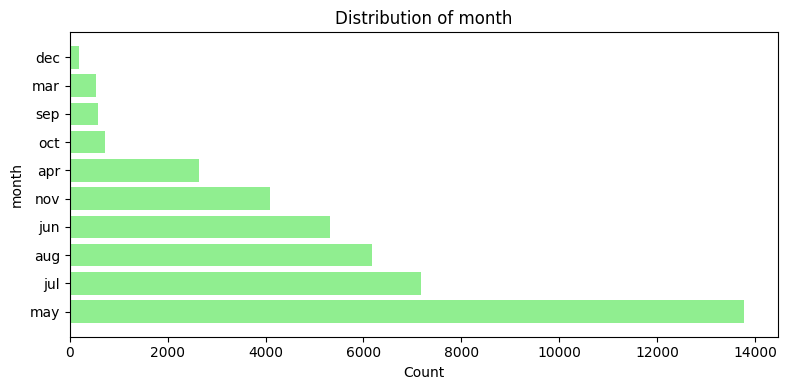

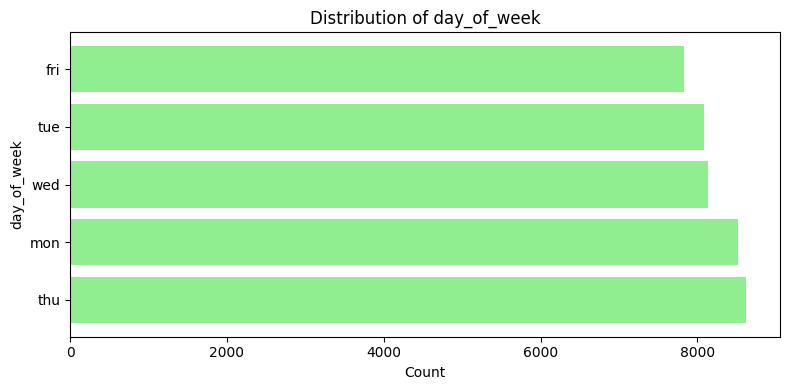

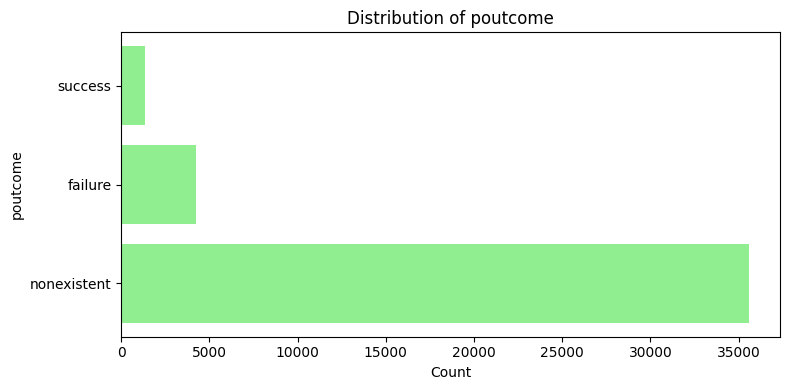

In [114]:
import matplotlib.pyplot as plt

class_counts = df['y'].value_counts()
print("Target class distribution:\n", class_counts)

plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

for col in categorical_features:
    plt.figure(figsize=(8, 4))
    value_counts = df[col].value_counts()
    plt.barh(value_counts.index, value_counts.values, color='lightgreen')
    plt.title(f"Distribution of {col}")
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


### Task 2 (Mandatory): Train a decision tree using scikit-learn.

Use max depth = 4 for initial interpretability. Visualize the tree using plot_tree().

**Discuss:** Which features are used at the top levels of the tree? Are they intuitive? 

--- Your answer here ---

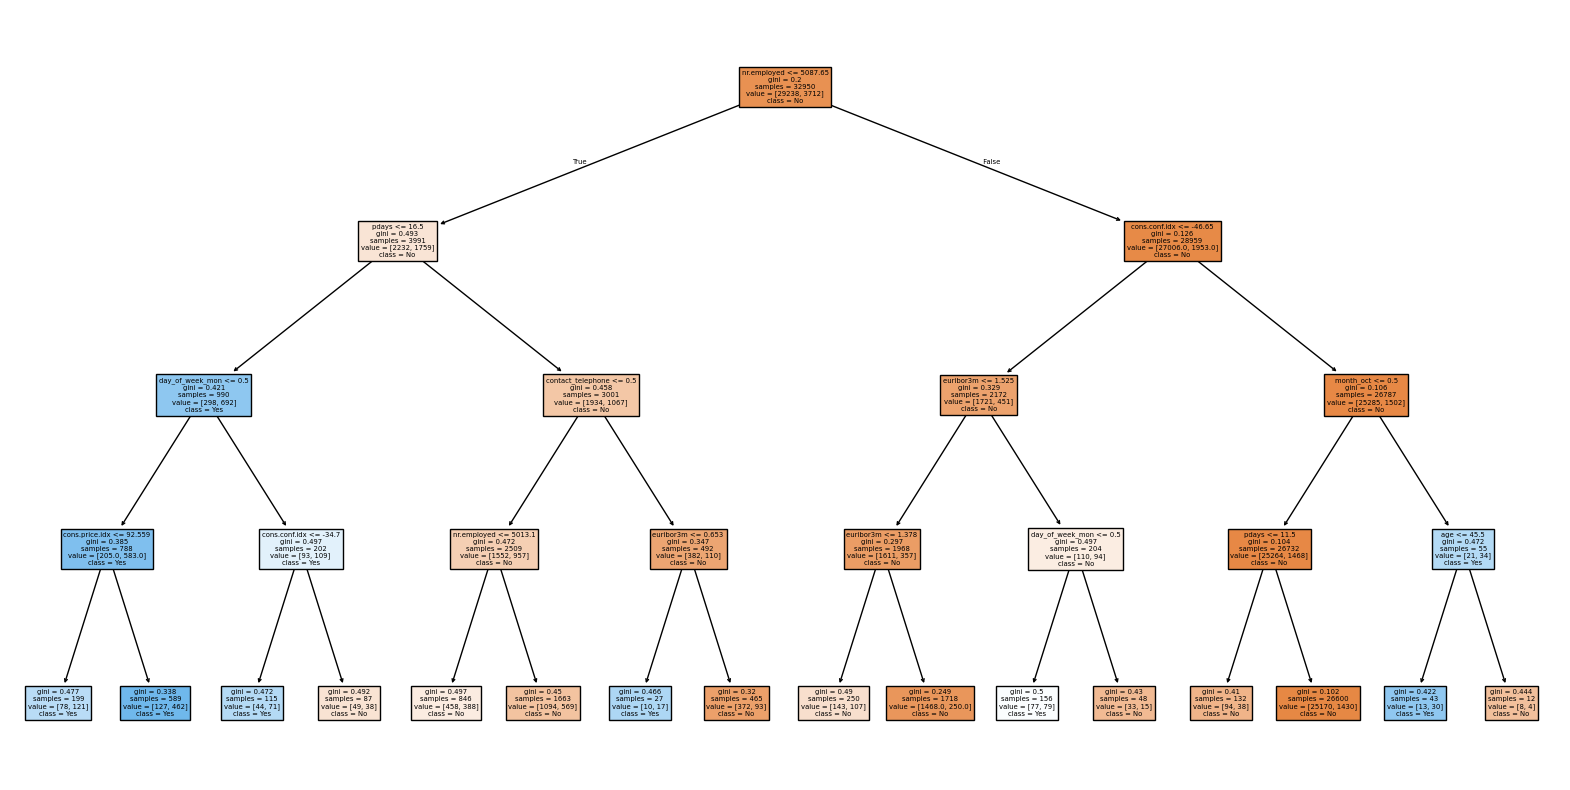

In [115]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=4, random_state=8)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=["No", "Yes"], filled=True)
plt.show()


### Task 3 (mandatory): Evaluate Performance and Overfitting
Train the same tree with increasing depths (e.g., 2 to 10). Evaluate on both training and test sets using accuracy and F1 score. Plot Accuracy vs. depth and F1 vs. depth.

**Discuss:** Is there overfitting? Where does performance peak?

Training Accuracy steadily increases with depth which is expected, since deeper trees can memorize training data better.

Test Accuracy:

Peaks around depth 5, then declines slightly.

This suggests that generalization worsens beyond a certain depth.

The gap between train and test accuracy widens after depth 6, a classic sign of overfitting.

**F1 Score Plot Analysis:**

Training F1 Score improves consistently with depth.

Test F1 Score:

Peaks around depth 7, indicating the best balance between precision and recall happens here.

Drops at depth 8, and stabilizes or slightly declines afterward.

This shows overfitting beyond depth 7, as the model becomes too specific to the training set.

**3. Overfitting Signs:**

Overfitting occurs when the model performs well on training data but poorly on unseen data.

The widening gap between training and test scores, especially after depth 6–7, is strong evidence of overfitting.

Performance peaks around depth 5–7.
Overfitting starts to appear from depth 8 onward.
For a good trade-off between interpretability and generalization, a depth of 4–6 is optimal.



In [116]:
for depth in range(2, 11):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=8)
    clf.fit(X_train, y_train)
    print(f"Decision Tree Classifier with max depth {depth}:\n")
    print(f"Train Accuracy: {clf.score(X_train, y_train):.4f}")
    print(f"Test Accuracy: {clf.score(X_test, y_test):.4f}\n")

Decision Tree Classifier with max depth 2:

Train Accuracy: 0.8993
Test Accuracy: 0.9002

Decision Tree Classifier with max depth 3:

Train Accuracy: 0.8997
Test Accuracy: 0.9007

Decision Tree Classifier with max depth 4:

Train Accuracy: 0.9004
Test Accuracy: 0.8997

Decision Tree Classifier with max depth 5:

Train Accuracy: 0.9027
Test Accuracy: 0.9022

Decision Tree Classifier with max depth 6:

Train Accuracy: 0.9049
Test Accuracy: 0.9019

Decision Tree Classifier with max depth 7:

Train Accuracy: 0.9078
Test Accuracy: 0.9017

Decision Tree Classifier with max depth 8:

Train Accuracy: 0.9104
Test Accuracy: 0.8995

Decision Tree Classifier with max depth 9:

Train Accuracy: 0.9137
Test Accuracy: 0.8997

Decision Tree Classifier with max depth 10:

Train Accuracy: 0.9180
Test Accuracy: 0.8986



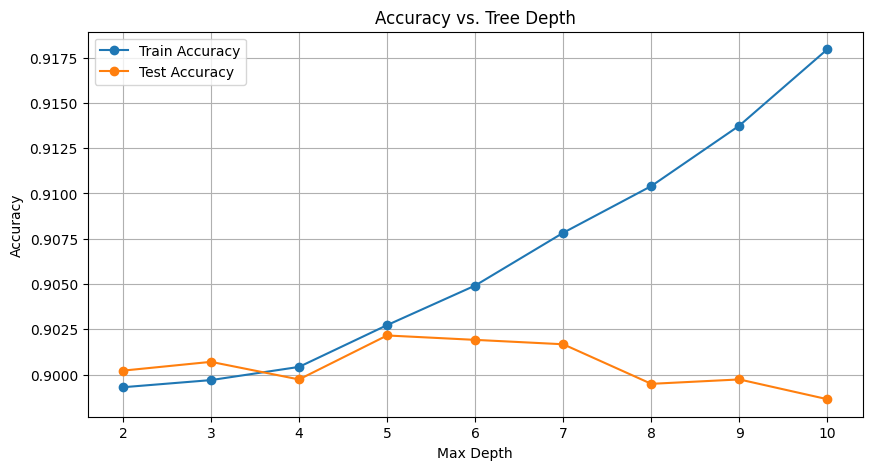

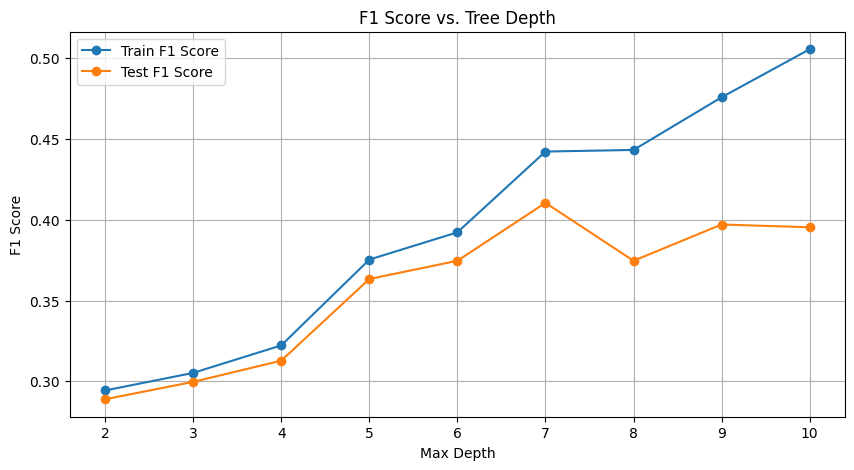

In [117]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

depths = range(2, 11)
train_accuracies = []
test_accuracies = []
train_f1s = []
test_f1s = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=8)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    train_f1s.append(f1_score(y_train, y_train_pred))
    test_f1s.append(f1_score(y_test, y_test_pred))

plt.figure(figsize=(10, 5))
plt.plot(depths, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(depths, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(depths, train_f1s, marker='o', label='Train F1 Score')
plt.plot(depths, test_f1s, marker='o', label='Test F1 Score')
plt.title('F1 Score vs. Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()


### Task 4 (Mandatory): Train and Compare Ensembles
Train a Random Forest and a Gradient Boosting model.
Tune hyperparameters using grid search (e.g., max_depth, n_estimators).
Do a plot comparing the ROC curves of the three models (Tree, RF, GB).

**Discuss:** Which model performs best and why?

---- Your answers here ----

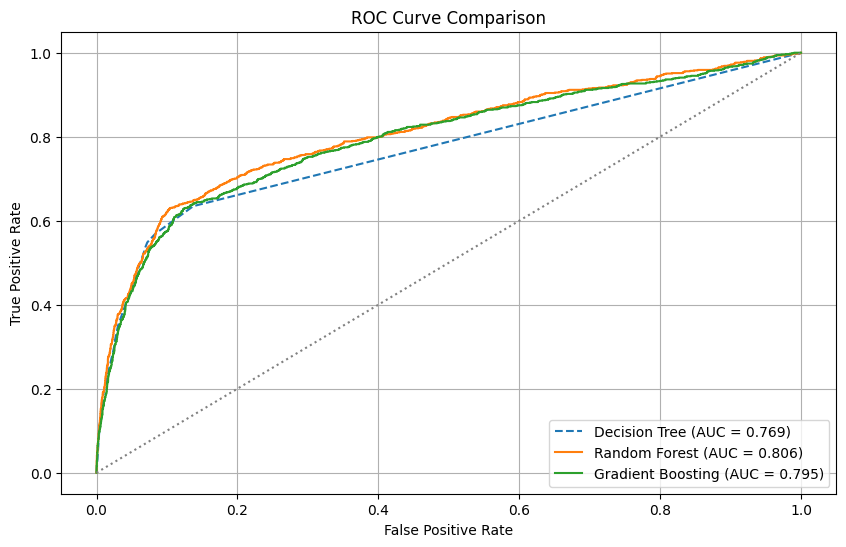

In [118]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

param_grid = {
    'max_depth': [4, 6, 8],
    'n_estimators': [50, 100, 150]
}

rf = RandomForestClassifier(random_state=8)
gb = GradientBoostingClassifier(random_state=8)

rf_grid = GridSearchCV(rf, param_grid, scoring='f1', cv=3, n_jobs=-1)
gb_grid = GridSearchCV(gb, param_grid, scoring='f1', cv=3, n_jobs=-1)

rf_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
gb_best = gb_grid.best_estimator_

dt = DecisionTreeClassifier(max_depth=4, random_state=8)
dt.fit(X_train, y_train)

y_score_dt = dt.predict_proba(X_test)[:, 1]
y_score_rf = rf_best.predict_proba(X_test)[:, 1]
y_score_gb = gb_best.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score_gb)

auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})", linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {auc_gb:.3f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='dotted')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Task 5 (Non-Mandatory): Feature Importance Analysis

Extract and plot feature importances for the ensemble models.

Plot the top 10 features by importance (bar chart).

**Discuss:** Are these the same features that dominated the decision tree?

---- Your answers here ----


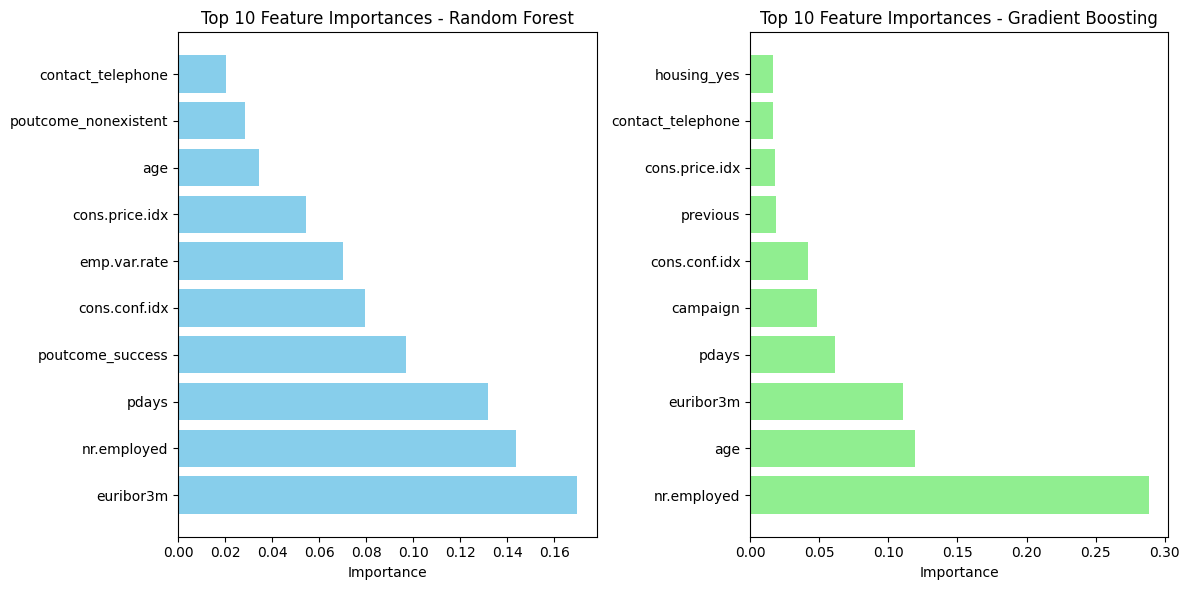

In [ ]:
#--- Write your code here ---#
import pandas as pd
import matplotlib.pyplot as plt

rf_importances = rf_best.feature_importances_
gb_importances = gb_best.feature_importances_

rf_feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False).head(10)

gb_feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(rf_feat_imp['Feature'], rf_feat_imp['Importance'], color='blue')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.subplot(1, 2, 2)
plt.barh(gb_feat_imp['Feature'], gb_feat_imp['Importance'], color='green')
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


### Task 6 (Non-Mandatory): Test Model Robustness to Noisy Features

Add synthetic noise features to the dataset. 
Generate 5–10 random columns with values sampled from a uniform or normal distribution.
Concatenate them with the original feature set.
Retrain your Random Forest and Gradient Boosting with the noisy features included.
Evaluate their performance on the test set.

Create a Bar plot comparing test set accuracy or F1 score before adding noise and after adding noise. 

**Discuss:** Did model performance degrade? Why or why not?

What does this tell you about the model’s ability to ignore irrelevant features?

Would feature selection or regularization help in this case?

--- Your answer here --- 


In [120]:
#--- Write your code here ---#

## Lecture 7 - Kernels, Maximal Margin Classifiers

### Task 1 (Mandatory): Data Exploration and Preprocessing

Load the dataset using sklearn.datasets.load_breast_cancer().

Standardize the features using StandardScaler.
Use pairplot or PCA to project to 2D and show class separation.

**Discuss:** Do the two classes appear linearly separable?
 
--- Your answer here --- 

   mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]


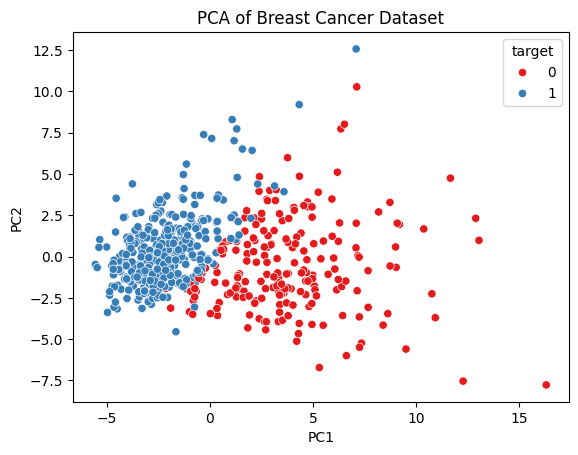

In [19]:
#--- Write your code here ---#
import sklearn.datasets
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

dataset =  sklearn.datasets.load_breast_cancer()
df_cancer = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df_cancer['target'] = dataset.target
print(df_cancer.head())

# Standardize the features using StandardScaler.
# Use pairplot or PCA to project to 2D and show class separation.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_cancer = scaler.fit_transform(df_cancer.drop('target', axis=1))
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_cancer_pca = pca.fit_transform(X_cancer)
import seaborn as sns
df_cancer_pca = pd.DataFrame(data=X_cancer_pca, columns=['PC1', 'PC2'])
df_cancer_pca['target'] = df_cancer['target']
sns.scatterplot(data=df_cancer_pca, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

# train and test data split
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(
    X_cancer_pca, df_cancer['target'], test_size=0.2, random_state=42, stratify=df_cancer['target']
)

### Task 2 (Mandatory): Train Linear and RBF SVMs

Train two SVM classifiers: one with a linear kernel and one with an RBF kernel.

Use a fixed C=1.0, and for RBF, use default gamma='scale'.

Plot the confusion matrices or classification reports for both models.

**Discuss:** Which kernel performed better? Why might that be?

--- Your answer here --- 

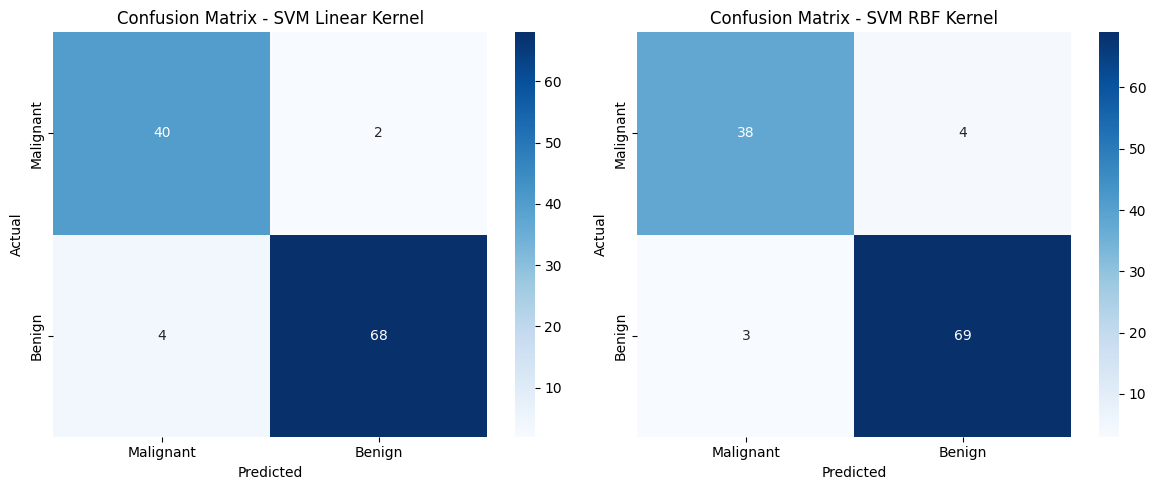

In [23]:
#--- Write your code here ---#
# Train two SVM classifiers: one with a linear kernel and one with an RBF kernel. Use a fixed C=1.0, and for RBF, use default gamma='scale'.
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_rbf = SVC(kernel='rbf', C = 1.0, gamma='scale', random_state=42)
svm_linear.fit(X_cancer_train, y_cancer_train)
svm_rbf.fit(X_cancer_train, y_cancer_train)
# Plot the confusion matrices or classification reports for both models.

y_pred_linear = svm_linear.predict(X_cancer_test)
y_pred_rbf = svm_rbf.predict(X_cancer_test)
cm_linear = confusion_matrix(y_cancer_test, y_pred_linear)
cm_rbf = confusion_matrix(y_cancer_test, y_pred_rbf)
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix - SVM Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1, 2, 2)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix - SVM RBF Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Task 3 (Mandatory): Hyperparameter Tuning

Use grid search with cross-validation to find optimal values of C and gamma for the RBF kernel.

Plot a heatmap of validation accuracy or F1 score for the grid.

**Discuss:** What combination of hyperparameters gave the best results?

--- Your answer here --- 

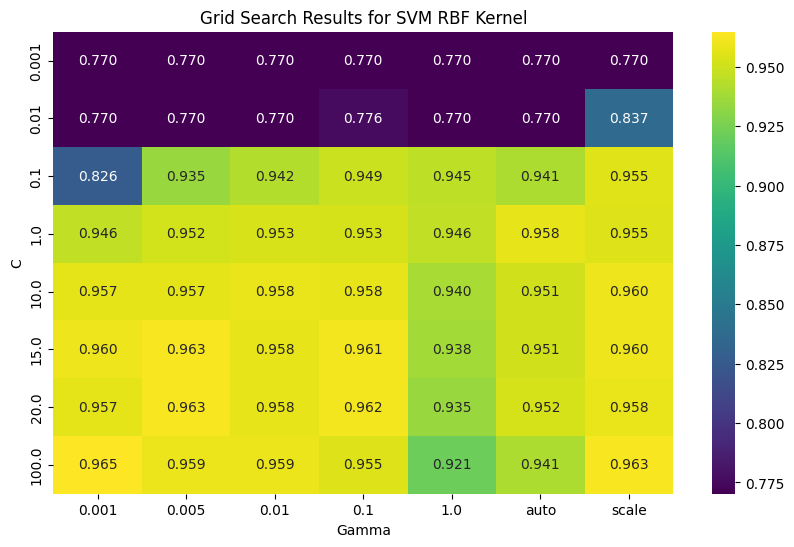

In [24]:
#-Use grid search with cross-validation to find optimal values of C and gamma for the RBF kernel.

# Plot a heatmap of validation accuracy or F1 score for the grid.

from sklearn.model_selection import GridSearchCV
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 15.0, 20.0, 100.0],
    'gamma': ['scale', 'auto', 0.001, 0.005, 0.01, 0.1, 1.0]
}
grid_search_svm = GridSearchCV(SVC(kernel='rbf'), param_grid_svm, scoring='f1', cv=5, n_jobs=-1)
grid_search_svm.fit(X_cancer_train, y_cancer_train)
results = pd.DataFrame(grid_search_svm.cv_results_)
heatmap_data = results.pivot_table(index='param_C', columns='param_gamma', values='mean_test_score')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f')
plt.title('Grid Search Results for SVM RBF Kernel')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

### Task 4 (non-mandatory): Investigate the Effect of the Regularization Parameter C

Train RBF SVM models for a wide range of C values (e.g., 0.001, 0.01, 0.1, 1, 10, 100), keeping gamma fixed.

For each model, record training and test accuracy or F1 score.

Plot the training and test scores vs. C (line plot).

**Discuss:**

- What happens when C is very small or very large?

- What does this tell you about the role of C in the SVM objective?

--- Your answer here --- 

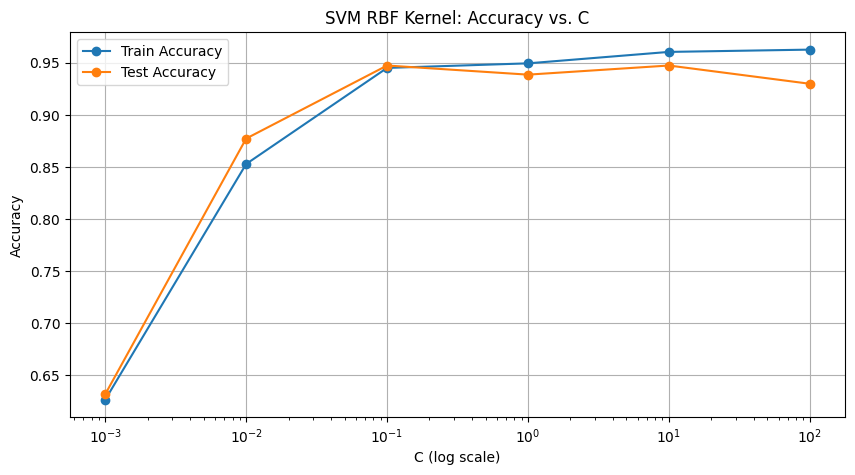

In [25]:
#--- Write your code here ---#
# Train RBF SVM models for a wide range of C values (e.g., 0.001, 0.01, 0.1, 1, 10, 100), keeping gamma fixed.

# For each model, record training and test accuracy or F1 score.

# Plot the training and test scores vs. C (line plot).
train_scores = []
test_scores = []
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm_rbf_c = SVC(kernel='rbf', C=c, gamma='scale', random_state=42)
    svm_rbf_c.fit(X_cancer_train, y_cancer_train)
    
    train_score = svm_rbf_c.score(X_cancer_train, y_cancer_train)
    test_score = svm_rbf_c.score(X_cancer_test, y_cancer_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
plt.figure(figsize=(10, 5))
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], train_scores, marker='o', label='Train Accuracy')
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], test_scores, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.title('SVM RBF Kernel: Accuracy vs. C')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Task 5 (non-mandatory): Compare SVM with Logistic Regression

Train a logistic regression model on the same (standardized) data.

Compare its performance with your best-performing SVM.

Plot, side-by-side bar plot of accuracy, precision, recall, and F1 score for both models.

**Discuss:**

- Which model performed better overall?

- Were there significant differences in false positives or false negatives?

- Based on your task (e.g., cancer detection), which type of error is more costly?

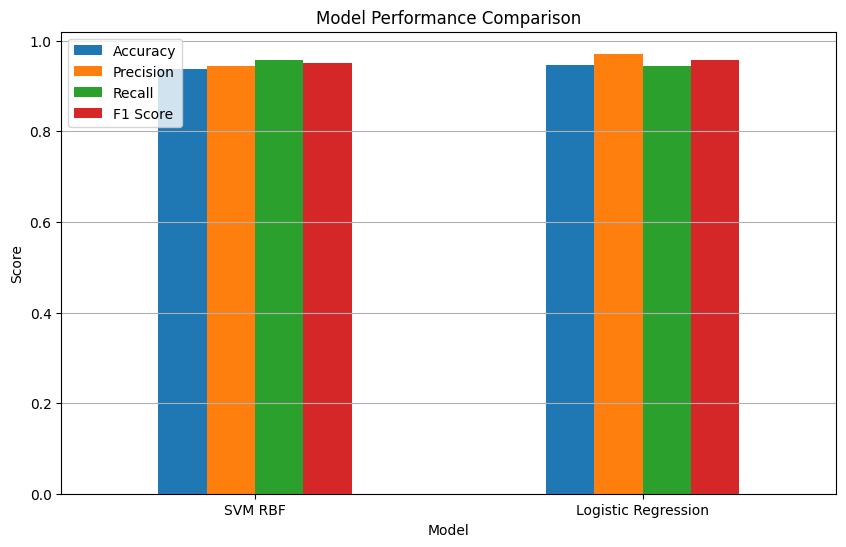

In [26]:
#--- Write your code here ---#
# Train a logistic regression model on the same (standardized) data.

# Compare its performance with your best-performing SVM.

# Plot, side-by-side bar plot of accuracy, precision, recall, and F1 score for both models.
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_cancer_train, y_cancer_train)
y_pred_log_reg = log_reg.predict(X_cancer_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
metrics = {
    'Model': ['SVM RBF', 'Logistic Regression'],
    'Accuracy': [accuracy_score(y_cancer_test, y_pred_rbf), accuracy_score(y_cancer_test, y_pred_log_reg)],
    'Precision': [precision_score(y_cancer_test, y_pred_rbf), precision_score(y_cancer_test, y_pred_log_reg)],
    'Recall': [recall_score(y_cancer_test, y_pred_rbf), recall_score(y_cancer_test, y_pred_log_reg)],
    'F1 Score': [f1_score(y_cancer_test, y_pred_rbf), f1_score(y_cancer_test, y_pred_log_reg)]
}
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.show()


## Lecture 8 - Clustering (All Mandatory)

In this assignment you will implement an unsupervised learning method, then you will test it with data sets of your choice. 

You must deliver the results in a jupyter notebook, combining the code, text, and images in a nice readable sequence.

**Goal:** Implement the clustering algorithm called Bisecting k-Means.
Bisecting k-Means [1] is a clustering algorithm that combines hierarchical clustering with k-Means. However, differently than the hierarchical clustering we saw in the lecture, it uses a divisive, top-down approach (instead of the agglomerative, bottom-up that we are used to). It consists on the steps described below:

1. Start with a single cluster including all the observations in the data set.
2. [Bisecting] Divide the largest cluster into two smaller sub-clusters using k-Means.
3. Redo the bisecting step iter times and choose the best solution according to the Sum of Squared Errors (SSE).
4. Repeat from Step 2 until you have k clusters.

Implement the Bisecting k-Means algorithm in a function called bkmeans. It should take as input: (a) the data X to cluster, as a n × p matrix (n observations by p features); (b) the number k of clusters; and (c) the number iter of iterations for step 3. It should generate as output a n × 1 vector with the cluster indices for each of the n observations.
Notes:
1. You must implement K-Means yourself, from scratch.
2. The requirements are strict. I will use standard test cases in order to test your solution by calling the function
bkmeans as described.

[1] M. Steinbach, G. Karypis, V. Kumar et al., “A comparison of document clustering techniques,” in
KDD workshop on text mining, vol. 400, no. 1. Boston, 2000, pp. 525–526. [Online]. Available:
http://glaros.dtc.umn.edu/gkhome/fetch/papers/docclusterKDDTMW00.pdf

In [30]:
#--- Write your code here ---#

## Lecture 9 - Dimensionality Reduction 

### Task 1 (mandatory)

In this exercise you will visualize and explore the results of the previous exercise in a simple manner, using scatterplots.
This will be a relatively open-ended task; you will choose three data sets and explore them with the new technique you built for yourself. 

These could be data sets you already used in previous assignments, or you could download some
new data. The only restrictions are that (a) the data sets must be multidimensional (i.e., more than 4 features), (b) they must have labels, and (c) they must have at least 1000 data points.

These are some examples of interesting places to obtain new data sets:

* http://archive.ics.uci.edu/ml/index.php
* https://www.openml.org/search?type=data
* https://www.kaggle.com/datasets

Be careful, however, with the size of the data set you choose. Python can get quite slow with too much data, and the scatterplots will also be very crowded, so go for smaller data sets this time.

**Important**: Download the datasets and put them under the folder *datasets* so that we can run your code.

In [127]:
#--- Write your code here ---#

### Task 2 (non-mandatory) - Comparison of DR Techniques

Generate a scatterplot matrix comparing the results of three DR techniques: PCA, MDS, and t-SNE, for each data set chosen in the previous exercise. 
The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of a DR technique applied to a data set. 
Color the points by their target variables (i.e., class/labels) using a qualitative colormap.

Then answer this shortly (in a couple of paragraphs): 
- In your opinion, which technique performed the best for each data set, regarding the separation of the classes? 
- How are the classes in the data sets separated? 
- Are some classes easier to separate than others?


### Task 3 (non-mandatory): Comparison of Clustering Techniques

Choose one of the DR techniques from the previous exercise and generate a similar scatterplot matrix to compare the results of Bisecting k-Means with classic k-Means and hierarchical clustering for each data set. 
The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of the chosen DR technique applied to a data set, with the colors of the points showing the clusters using a qualitative colormap (see, e.g., https://matplotlib.org/tutorials/colors/colormaps.html).

Then answer this shortly (in a couple of paragraphs): 
- In your opinion, which clustering technique performed the best for each data set? 
- How are the clusters in the data sets separated? 
- Are some clusters easier to separate than others?